## Лабораторная работа №1 по курсу "Машинное обучение"

Бердикин Тимофей М8О-307Б-18

### Датасет

Начнём работу с загрузки датасета с грибами.

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('mushroom.csv')

Теперь выведем некоторую информацию о датасете:

In [2]:
data.shape

(8124, 23)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [4]:
data.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


Необходимо проверить, есть ли в датасете пустые значения. Если таковые будут - их необходимо удалить, чтобы датасет был более красивым и практичным для дальнейшей работы.

In [5]:
data['stalk-root'].isnull().max()

True

С помощью isnull мы превращаем столбец из значений в булевский столбец, где True означает, что в ячейке пустое значение, а False - непустое. И если максимум по булевскому столбцу - это значение True, значит, пустые значения всё же есть. Придётся удалить все строки с пустыми значениями.

In [6]:
data = data.dropna()

Необходимо убедиться, что пустых ячеек больше нет.

In [7]:
data['stalk-root'].isnull().max()

False

Что ж, теперь стоит посмотреть, насколько изменился наш датасет после такой зачистки.

In [8]:
data.shape

(5644, 23)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5644 entries, 0 to 8114
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 5644 non-null   object
 1   cap-surface               5644 non-null   object
 2   cap-color                 5644 non-null   object
 3   bruises                   5644 non-null   object
 4   odor                      5644 non-null   object
 5   gill-attachment           5644 non-null   object
 6   gill-spacing              5644 non-null   object
 7   gill-size                 5644 non-null   object
 8   gill-color                5644 non-null   object
 9   stalk-shape               5644 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  5644 non-null   object
 12  stalk-surface-below-ring  5644 non-null   object
 13  stalk-color-above-ring    5644 non-null   object
 14  stalk-color-below-ring  

In [10]:
data.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644,...,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644
unique,6,4,8,2,7,2,2,2,9,2,...,7,7,1,2,3,4,6,6,6,2
top,x,y,g,t,n,f,c,b,p,t,...,w,w,p,w,o,p,n,v,d,e
freq,2840,2220,1696,3184,2776,5626,4620,4940,1384,2880,...,3136,3088,5644,5636,5488,3488,1920,2160,2492,3488


Необходимо преобразовать буквенные обозначения классов в численные для дальнейшей работы, и у pandas есть для этого всё, что нам нужно -- класс для работы с категориальными признаками pd.Categorical. Передадим столбец с категориальным признаком в конструктор класса. Поле codes содержит численные коды для каждого признака, это нам и нужно.

In [11]:
cols = list(data.columns)
data[cols] = data[cols].apply(lambda x: pd.Categorical(x).codes)
data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,2,0,...,5,5,0,0,1,3,1,3,5,1
1,5,2,7,1,0,1,0,0,2,0,...,5,5,0,0,1,3,2,2,1,0
2,0,2,6,1,3,1,0,0,3,0,...,5,5,0,0,1,3,2,2,3,0
3,5,3,6,1,6,1,0,1,3,0,...,5,5,0,0,1,3,1,3,5,1
4,5,2,3,0,5,1,1,0,2,1,...,5,5,0,0,1,0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,0,3,4,0,5,1,0,0,7,0,...,3,3,0,0,2,3,5,5,4,0
8001,5,3,4,0,5,1,0,0,7,0,...,3,3,0,0,2,3,5,5,4,0
8038,5,3,3,1,5,1,0,0,7,0,...,5,5,0,0,2,3,5,5,4,0
8095,5,3,1,0,4,1,0,0,8,0,...,1,1,0,0,0,2,5,1,0,1


Давайте взглянем на распределения каждого признака:

array([[<AxesSubplot:title={'center':'cap-shape'}>,
        <AxesSubplot:title={'center':'cap-surface'}>,
        <AxesSubplot:title={'center':'cap-color'}>,
        <AxesSubplot:title={'center':'bruises'}>,
        <AxesSubplot:title={'center':'odor'}>],
       [<AxesSubplot:title={'center':'gill-attachment'}>,
        <AxesSubplot:title={'center':'gill-spacing'}>,
        <AxesSubplot:title={'center':'gill-size'}>,
        <AxesSubplot:title={'center':'gill-color'}>,
        <AxesSubplot:title={'center':'stalk-shape'}>],
       [<AxesSubplot:title={'center':'stalk-root'}>,
        <AxesSubplot:title={'center':'stalk-surface-above-ring'}>,
        <AxesSubplot:title={'center':'stalk-surface-below-ring'}>,
        <AxesSubplot:title={'center':'stalk-color-above-ring'}>,
        <AxesSubplot:title={'center':'stalk-color-below-ring'}>],
       [<AxesSubplot:title={'center':'veil-type'}>,
        <AxesSubplot:title={'center':'veil-color'}>,
        <AxesSubplot:title={'center':'ring-numbe

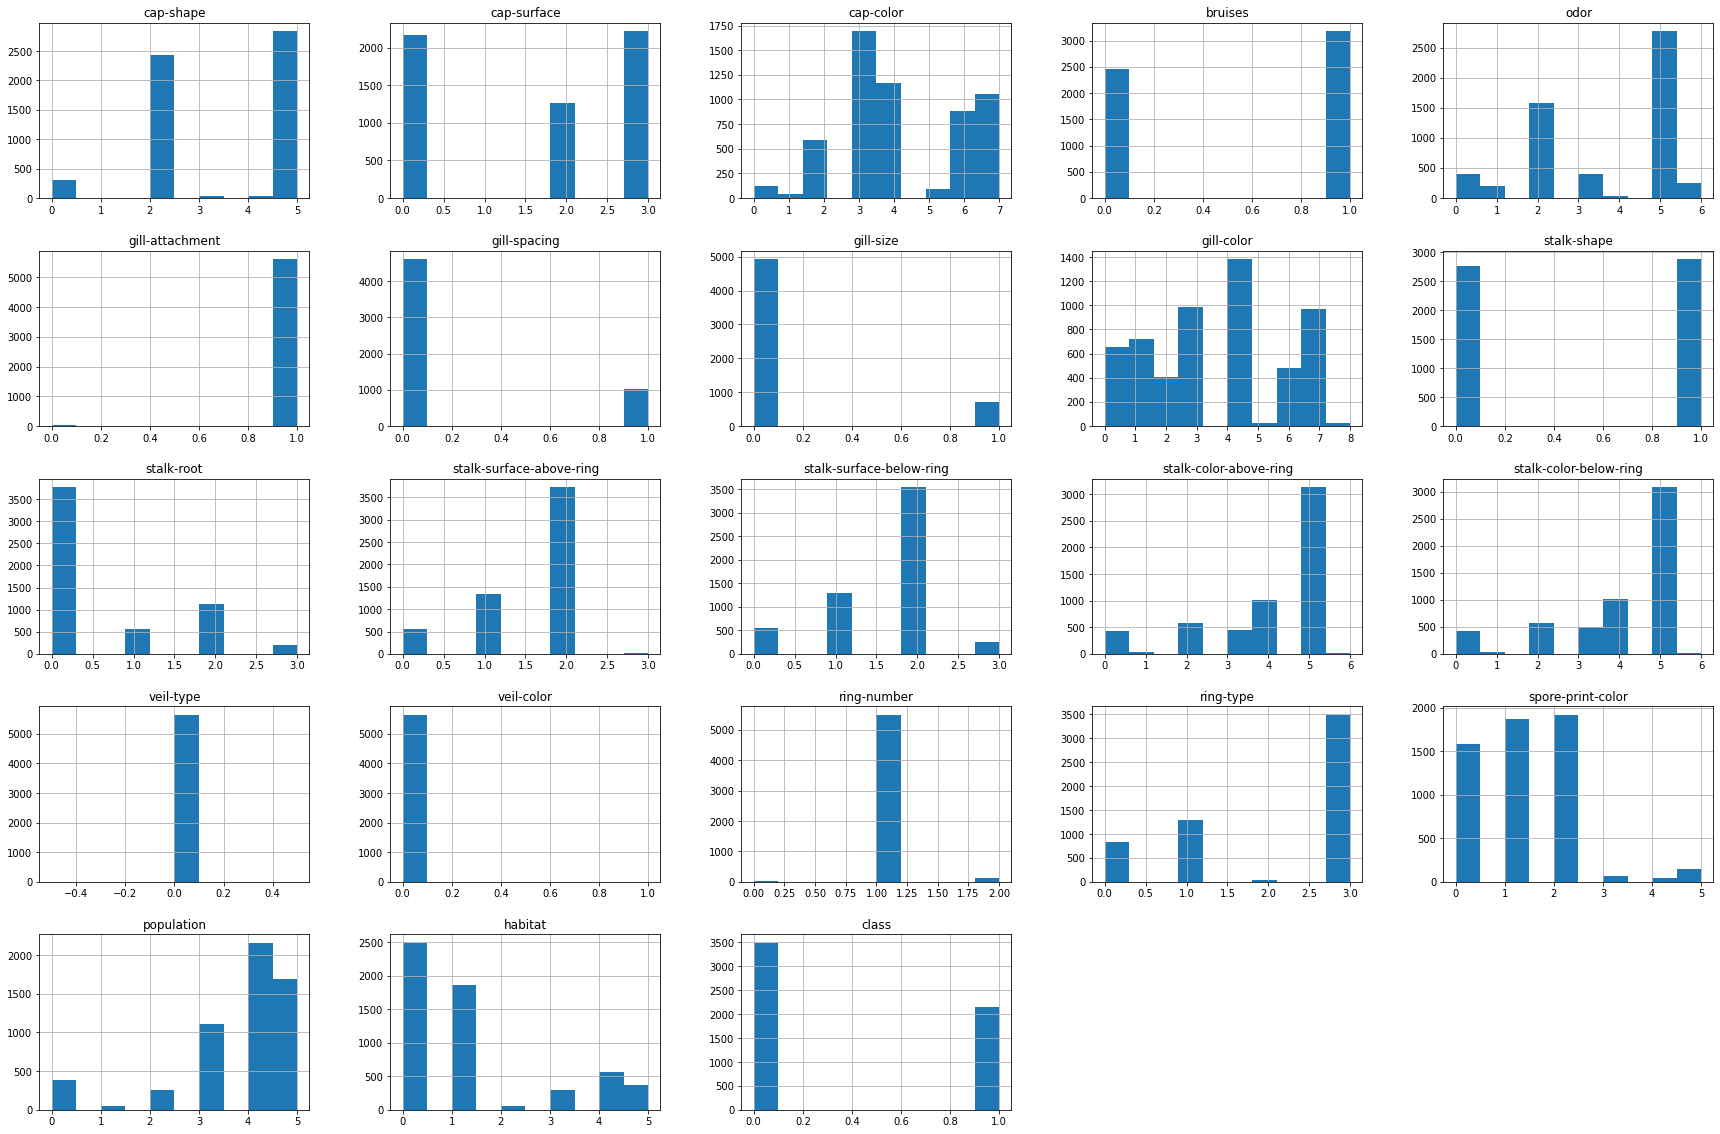

In [12]:
data[cols].hist(figsize=(30,20))

Стоит также проверить зависимости между признаками. Видно, что у большинства признаков корреляция по модулю меньше одной десятой. Кстати, корреляция для veil-type принимает значение NaN, так как veil-type принимает всего одно значение.

In [13]:
data.corr()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
cap-shape,1.000000,-0.068688,-0.056421,-0.097782,0.000011,0.002963,0.051432,0.103443,-0.006431,0.049043,...,-0.030272,-0.029700,NaN,-0.043596,-0.118191,-0.029420,-0.062007,0.048283,-0.057451,0.053155
cap-surface,-0.068688,1.000000,0.093355,0.228590,-0.108697,-0.058104,-0.204448,-0.042356,0.073668,-0.173554,...,0.045018,0.046099,NaN,0.038702,0.044289,0.190188,0.054747,-0.000390,0.106918,0.046859
cap-color,-0.056421,0.093355,1.000000,-0.165794,-0.400652,0.059693,0.062189,0.102676,-0.242099,-0.444682,...,0.046088,0.056865,NaN,0.055906,-0.006358,-0.142629,-0.105214,-0.171096,0.196001,0.150741
bruises,-0.097782,0.228590,-0.165794,1.000000,0.235055,0.064351,-0.439183,-0.040178,0.470309,0.348294,...,0.243577,0.256369,NaN,-0.042863,0.122162,0.861993,0.292185,0.196296,-0.114367,-0.435562
odor,0.000011,-0.108697,-0.400652,0.235055,1.000000,-0.013940,0.195187,0.049305,0.303104,0.588813,...,0.131815,0.122807,NaN,0.030623,0.094874,0.041458,0.397319,-0.059285,-0.223349,-0.455566
gill-attachment,0.002963,-0.058104,0.059693,0.064351,-0.013940,1.000000,0.026630,0.021353,-0.098267,0.057738,...,0.109340,0.108756,NaN,0.002131,0.346682,0.004571,-0.202135,0.115499,0.043755,-0.071945
gill-spacing,0.051432,-0.204448,0.062189,-0.439183,0.195187,0.026630,1.000000,0.178484,-0.098702,0.314060,...,0.326465,0.302918,NaN,0.080026,-0.042316,-0.596261,0.286257,-0.595910,-0.106367,-0.264160
gill-size,0.103443,-0.042356,0.102676,-0.040178,0.049305,0.021353,0.178484,1.000000,0.064420,-0.282368,...,0.262655,0.233227,NaN,0.099801,-0.033931,0.210490,0.287764,-0.008851,0.169763,0.215289
gill-color,-0.006431,0.073668,-0.242099,0.470309,0.303104,-0.098267,-0.098702,0.064420,1.000000,0.306678,...,0.124320,0.107444,NaN,0.065453,0.026691,0.423308,0.404772,0.105207,-0.176599,-0.318339
stalk-shape,0.049043,-0.173554,-0.444682,0.348294,0.588813,0.057738,0.314060,-0.282368,0.306678,1.000000,...,0.167451,0.178907,NaN,-0.038458,-0.091748,0.088685,0.177882,-0.099598,-0.427601,-0.592446


Давайте уберём veil-type, ведь он для всех грибов абсолютно одинаков.

In [14]:
data = data.drop(columns=['veil-type'])
data.corr()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
cap-shape,1.000000,-0.068688,-0.056421,-0.097782,0.000011,0.002963,0.051432,0.103443,-0.006431,0.049043,...,-0.029780,-0.030272,-0.029700,-0.043596,-0.118191,-0.029420,-0.062007,0.048283,-0.057451,0.053155
cap-surface,-0.068688,1.000000,0.093355,0.228590,-0.108697,-0.058104,-0.204448,-0.042356,0.073668,-0.173554,...,0.162293,0.045018,0.046099,0.038702,0.044289,0.190188,0.054747,-0.000390,0.106918,0.046859
cap-color,-0.056421,0.093355,1.000000,-0.165794,-0.400652,0.059693,0.062189,0.102676,-0.242099,-0.444682,...,-0.047284,0.046088,0.056865,0.055906,-0.006358,-0.142629,-0.105214,-0.171096,0.196001,0.150741
bruises,-0.097782,0.228590,-0.165794,1.000000,0.235055,0.064351,-0.439183,-0.040178,0.470309,0.348294,...,0.552523,0.243577,0.256369,-0.042863,0.122162,0.861993,0.292185,0.196296,-0.114367,-0.435562
odor,0.000011,-0.108697,-0.400652,0.235055,1.000000,-0.013940,0.195187,0.049305,0.303104,0.588813,...,0.133688,0.131815,0.122807,0.030623,0.094874,0.041458,0.397319,-0.059285,-0.223349,-0.455566
gill-attachment,0.002963,-0.058104,0.059693,0.064351,-0.013940,1.000000,0.026630,0.021353,-0.098267,0.057738,...,-0.108225,0.109340,0.108756,0.002131,0.346682,0.004571,-0.202135,0.115499,0.043755,-0.071945
gill-spacing,0.051432,-0.204448,0.062189,-0.439183,0.195187,0.026630,1.000000,0.178484,-0.098702,0.314060,...,-0.266521,0.326465,0.302918,0.080026,-0.042316,-0.596261,0.286257,-0.595910,-0.106367,-0.264160
gill-size,0.103443,-0.042356,0.102676,-0.040178,0.049305,0.021353,0.178484,1.000000,0.064420,-0.282368,...,0.169387,0.262655,0.233227,0.099801,-0.033931,0.210490,0.287764,-0.008851,0.169763,0.215289
gill-color,-0.006431,0.073668,-0.242099,0.470309,0.303104,-0.098267,-0.098702,0.064420,1.000000,0.306678,...,0.362442,0.124320,0.107444,0.065453,0.026691,0.423308,0.404772,0.105207,-0.176599,-0.318339
stalk-shape,0.049043,-0.173554,-0.444682,0.348294,0.588813,0.057738,0.314060,-0.282368,0.306678,1.000000,...,0.019684,0.167451,0.178907,-0.038458,-0.091748,0.088685,0.177882,-0.099598,-0.427601,-0.592446


### Алгоритм KNN

Давайте реализуем алгоритм KNN для данного датасета c целью определить по признакам гриба, съедобный он или нет.

In [15]:
X, Y = data.drop(columns=['class']).to_numpy(), np.array(data['class'])

Для этого нам придётся ввести функцию расстояния для двух объектов. Расстоянием будет количество несовпадающих элементов из-за номинальности всех параметров.

In [16]:
def dist(a, b):
    return np.count_nonzero(a - b)

Для реализации алгоритма KNN нам необходимо разбить датасет на две выборки - тестовую и тренировочную (обучающую), и для каждого элемента из тестовой вычислить расстояния до всех элементов из тренировочной выборки. После этого мы выбираем k ближайших элементов из тренировочной выборки. Далее смотрим, элементы какого класса преобладают в данной выборке. Класс большинства и является результатом работы KNN для элемента из тестовой выборки. После этого сравниваем полученный класс с исходным. Точность работы KNN равна числу элементов из тестовой выборки, у которых класс был определён правильно, к общему числу элементов из тестовой выборки

In [17]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.15, random_state=15)

In [18]:
def myKNN(X, k):
    y = np.zeros(X.shape[0])
    
    for index in range(X.shape[0]):
        n = Xtrain.shape[0]
        x = X[index]

        #список индексов объектов и расстояний до них
        dist_class = np.zeros((n, 2))

        for i in range(n):
            dist_class[i][0] = i
            dist_class[i][1] = dist(Xtrain[i], x)

        #выбираем k ближайших соседей
        kn = sorted(dist_class, key=lambda x: x[1])[:k]

        #определяем, какой класс преобладает
        num_class = [0, 0]
        for i in range(k):
            num_class[Ytrain[int(kn[i][0])]] += 1

        if num_class[0] > num_class[1]:
            y[index] = 0
        else:
            y[index] = 1
    
    return y

In [19]:
#positive -- ядовитый, negative -- съедобный, y -- точные значения, y0 -- вычисленные
def print_accuracy(y, y0):
    tp, fp, tn, fn = 0, 0, 0, 0
    
    for i in range(y.shape[0]):
        if y[i] == 0 and y0[i] == 0: tn += 1
        if y[i] == 1 and y0[i] == 0: fn += 1
        if y[i] == 0 and y0[i] == 1: fp += 1
        if y[i] == 1 and y0[i] == 1: tp += 1
        
    print('Accuracy:', (tp + tn) / (tp + tn + fp + fn))
    print('Precision:', tp / (tp + fp))
    print('Recall:', tp / (tp + fn))

In [20]:
print_accuracy(Ytest, myKNN(Xtest, 25))

Accuracy: 0.9940968122786304
Precision: 1.0
Recall: 0.9845679012345679


Сравним точность с реализацией sklearn

In [21]:
from sklearn.neighbors import KNeighborsClassifier

sk_knn = KNeighborsClassifier(25, metric=dist)
sk_knn.fit(Xtrain, Ytrain)

print_accuracy(Ytest, sk_knn.predict(Xtest))

Accuracy: 0.9940968122786304
Precision: 1.0
Recall: 0.9845679012345679


Как видно, точности полностью совпадают. Более того, мы получили очень высокую точность оценки. Таким образом, по признакам гриба можно очень точно определить, съедобный он или нет.

### Наивный Байесовский классификатор

Для наивного Байесовского классификатора необходимо определить вероятности появления каждого класса и условную вероятность появления каждого признака для каждого класса.

In [22]:
nb_count1 = np.count_nonzero(Ytrain)
nb_count0 = Ytrain.shape[0] - nb_count1
nb_prob0 = nb_count0 / Ytrain.shape[0]
nb_prob1 = nb_count1 / Ytrain.shape[0]

In [23]:
#если xi=j, то nb_probsC[i][j] условная вероятность xi=j в классе C
nb_probs0, nb_probs1 = [], []

for i in range(Xtrain.shape[1]):
    nb_probs0.append(np.zeros(Xtrain[::,i].max() + 1))
    nb_probs1.append(np.zeros(Xtrain[::,i].max() + 1))
    
    for j in range(Xtrain.shape[0]):
        if Ytrain[j] == 0:
            nb_probs0[i][Xtrain[j][i]] += 1
        else:
            nb_probs1[i][Xtrain[j][i]] += 1
    
    if np.count_nonzero(nb_probs0[i]) != nb_probs0[i].shape[0]:
        nb_probs0[i] = nb_probs0[i] + 1
        
    if np.count_nonzero(nb_probs1[i]) != nb_probs1[i].shape[0]:
        nb_probs1[i] = nb_probs1[i] + 1
    
    nb_probs0[i] = nb_probs0[i] / nb_count0
    nb_probs1[i] = nb_probs1[i] / nb_count1

Наивный Байесовский классификатор оценивает вероятности принадлежности строки к классам и возвращает класс с наибольшей вероятностью. Эти вероятности вычисляются как произведения условных вероятностей для каждого элемента строки и вероятности данного класса

In [24]:
def myNB(X):
    y = np.zeros(X.shape[0])
    
    for index in range(X.shape[0]):
        x = X[index]
        p0 = nb_prob0
        p1 = nb_prob1

        for i in range(x.shape[0]):
            p0 *= nb_probs0[i][x[i]]
            p1 *= nb_probs1[i][x[i]]

        if p1 > p0:
            y[index] = 1
        else:
            y[index] = 0
    
    return y

In [25]:
print_accuracy(Ytest, myNB(Xtest))

Accuracy: 0.9752066115702479
Precision: 0.9967213114754099
Recall: 0.9382716049382716


Сравним точность с реализацией sklearn.

In [26]:
from sklearn import naive_bayes
sk_nb = naive_bayes.CategoricalNB()
sk_nb.fit(Xtrain, Ytrain)

print_accuracy(Ytest, sk_nb.predict(Xtest))

Accuracy: 0.9752066115702479
Precision: 0.9967213114754099
Recall: 0.9382716049382716


Как видно, точности полностью совпадают. Точности также получились очень высокими, но пока всё ещё ниже, чем у алгоритма KNN.

### Вывод

Я проанализировал датасет с характеристиками грибов, выявил и устранил проблемы набора данных, т.е. убрал пустые ячейки и те, в которых не было необходимости. Реализовал наивный Байесовский классификатор и алкгоритм КNN, которые работают с довольно высокой точностью, что ещё раз говорит о том, что по внешним признакам гриба легко можно определить его съедобность.